In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [30]:
welcome = Table.read_table('welcome_survey_sp23.csv')
welcome.show(5)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,None,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0
Third Year,8,4,5,Right-handed,I don't know,On your back,Bird,0
First Year,3,15,6,Left-handed,Right leg in first,On your back,Bird,0


In [40]:
welcome.column_labels

/Users/mrk/miniforge3/envs/py310_2/lib/python3.10/site-packages/datascience/tables.py:310: FutureWarning:

column_labels is deprecated; use labels



('Year',
 'Extraversion',
 'Number of textees',
 'Hours of sleep',
 'Handedness',
 'Pant leg',
 'Sleep position',
 'Pets',
 'Piercings')

In [31]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

7.067497403946002

In [32]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

498

In [33]:
# Second way
np.count_nonzero(welcome.column('Hours of sleep') >= 8)

498

In [34]:
# Third way
np.sum(welcome.column('Hours of sleep') >= 8)

498

In [35]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
9,On your right side
8,On your back
8,On your left side


In [36]:
# Second way
two_col = welcome.drop(
    'Handedness', 'Extraversion',
    'Pant leg', 'Number of textees',
    'Pets', 'Piercings',
    'Year', 'Extroversion')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
9,On your right side
8,On your back
8,On your left side


## Discussion Question: NBA Salaries

In [41]:
nba = Table.read_table('nba_salaries.csv')
nba.show(3)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000


In [43]:
# Question (a)
guards = nba.where('position', 'PG')
guards.where('salary', are.above(15000000)).column('name')

array(['Damon Stoudamire', 'Stephon Marbury', 'Jason Kidd', 'Jason Kidd',
       'Stephon Marbury', 'Steve Francis', 'Baron Davis', 'Jason Kidd',
       'Stephon Marbury', 'Baron Davis', 'Jason Kidd', 'Stephon Marbury',
       'Gilbert Arenas', 'Gilbert Arenas', 'Chris Paul', 'Deron Williams',
       'Chris Paul', 'Derrick Rose', 'Deron Williams', 'Chris Paul',
       'Deron Williams', 'Derrick Rose', 'Chris Paul', 'Deron Williams',
       'Derrick Rose', 'Russell Westbrook', 'Chris Paul', 'Derrick Rose',
       'Russell Westbrook', 'Kyrie Irving', 'John Wall', 'Mike Conley',
       'Russell Westbrook', 'Damian Lillard', 'Chris Paul',
       'Derrick Rose', 'Kyrie Irving', 'John Wall', 'Goran Dragic',
       'Stephen Curry', 'Kyle Lowry', 'Mike Conley', 'Russell Westbrook',
       'Damian Lillard', 'Chris Paul', 'John Wall', 'George Hill',
       'Jeff Teague', 'Kyrie Irving', 'Goran Dragic', 'Reggie Jackson',
       'Dennis Schroder', 'Stephen Curry', 'Chris Paul',
       'Russell Wes

In [ ]:
# # Question (b)
# nba.drop('position')
# nba.num_columns

## Census ##

In [3]:
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [4]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial.show(5)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [5]:
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')
us_pop.show(5)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [6]:
us_pop.where('AGE', are.above_or_equal_to(100)).sort('AGE')

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199


In [21]:
unique, counts = np.unique(us_pop.column('AGE'), return_counts=True)


(array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   9.99,  19.98,  29.97,  39.96,  49.95,  59.94,  69.93,
         79.92,  89.91,  99.9 , 109.89, 119.88, 129.87, 139.86, 149.85,
        159.84, 169.83, 179.82, 189.81, 199.8 , 209.79, 219.78, 229.77,
        239.76, 249.75, 259.74, 269.73, 279.72, 289.71, 299.7 , 309.69,
        319.68, 329.67, 339.66, 349.65, 359.64, 369.63, 379.62, 389.61,
        399.6 , 409.59, 419.58, 429.57, 439.56, 449.55, 459.54, 469.53,
  

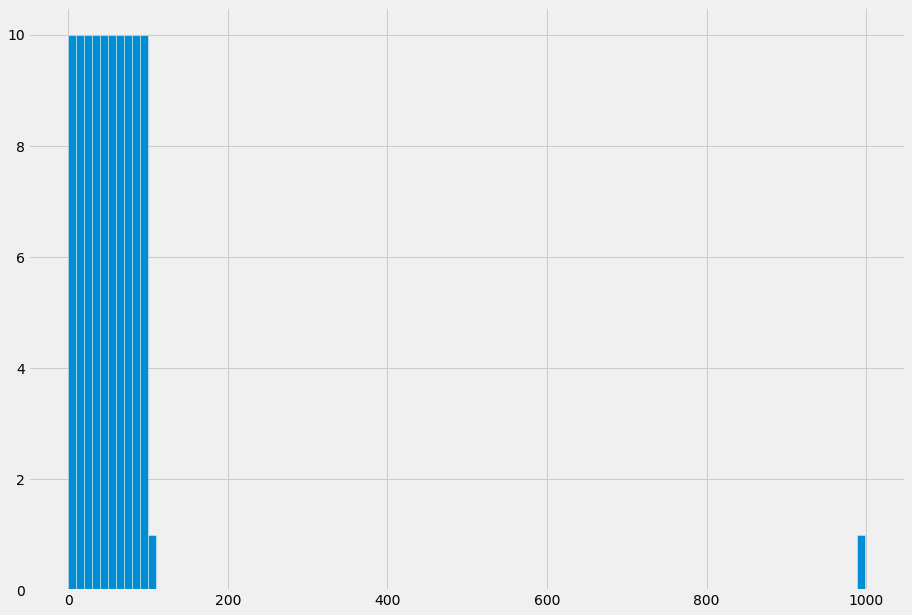

In [28]:
plots.figure(figsize=(14,10))
plots.hist(np.unique(us_pop.column('AGE')), bins=100)

## 2019 Sex Ratios ##

In [29]:
us_pop_2019 = us_pop.drop('2014')
us_pop_2019.show(3)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044


In [44]:
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [45]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [46]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females.show(3)

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500


In [47]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males.show(3)

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544


In [48]:
f_to_m_ratios = females.column(2) / males.column(2)

ratios = Table().with_columns(
    'Age', females.column('AGE'),
    'F:M Ratio', f_to_m_ratios
)

ratios

Age,F:M Ratio
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [49]:
ratios.sort('Age', descending=True)

Age,F:M Ratio
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969
95,2.34042
94,2.2271
93,2.10192
92,1.99252
91,1.90275


## Line Plot

In [56]:
help(ratios.plot)

Help on method plot in module datascience.tables:

plot(column_for_xticks=None, select=None, overlay=True, width=None, height=None, **vargs) method of datascience.tables.Table instance
    Plot line charts for the table. Redirects to ``Table#iplot`` for plotly charts if interactive
    plots are enabled with ``Table#interactive_plots``
    
    Args:
        column_for_xticks (``str/array``): A column containing x-axis labels
    
    Kwargs:
        overlay (bool): create a chart with one color per data column;
            if False, each plot will be displayed separately.
    
        show (bool): whether to show the figure if using interactive plots; if false, the figure 
            is returned instead
    
        vargs: Additional arguments that get passed into `plt.plot`.
            See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
            for additional arguments that can be passed into vargs.
    Raises:
        ValueError -- Every selected column must b

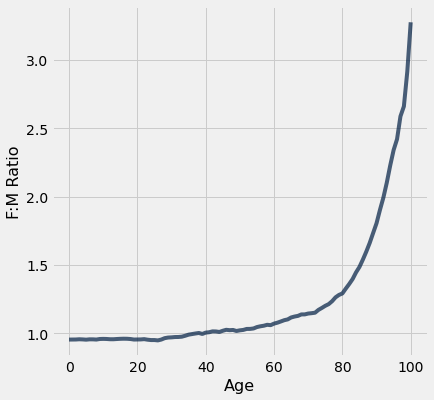

In [65]:
import collections
collections.Iterable = collections.abc.Iterable
ratios.plot('Age','F:M Ratio')